### Week 2 Homework

For questions 1 and 2: 

Do a regression to estimate the fixed effect of each group. We assume that there is one single linear coefficient for all the data, plus the fixed effect of each group. Use the file homework_2.1.csv.  The variables G1, G2, and G3 are the outcomes and the time is the treatment.

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

In [2]:
# read the homework 2.1 file
df_1 = pd.read_csv(r'C:\Users\JT von Seggern\DS Masters Repos\2025-summer-mod-6\homework_2.1.csv')
df_1 = df_1.drop(columns=['Unnamed: 0'])

In [3]:
df_1

,time,G1,G2,G3
0,0,0.882026,1.441575,0.065409
1,1,0.210079,-0.163880,0.140310
2,2,0.509369,-0.115242,0.819830
3,3,1.150447,1.014698,0.607632
4,4,0.973779,-0.046562,0.610066
...,...,...,...,...
95,95,1.303287,1.364227,1.768446
96,96,0.965250,1.845895,1.258862
97,97,1.862935,1.881752,1.511477
98,98,1.043456,2.561618,1.030275


In [4]:
# create a new dataframe that stacks all the group values into a single column
df_1_2 = pd.DataFrame(columns=['time', 'value', 'group'])
for col in df_1.columns:
    if col.startswith('G'):
        temp_df = df_1[['time', col]].rename(columns={col: 'value'})
        temp_df['group'] = col
        df_1_2 = pd.concat([df_1_2, temp_df], ignore_index=True)

df_1_2

C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_5792\2842754737.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_1_2 = pd.concat([df_1_2, temp_df], ignore_index=True)


,time,value,group
0,0,0.882026,G1
1,1,0.210079,G1
2,2,0.509369,G1
3,3,1.150447,G1
4,4,0.973779,G1
...,...,...,...
295,95,1.768446,G3
296,96,1.258862,G3
297,97,1.511477,G3
298,98,1.030275,G3


<Axes: xlabel='time', ylabel='value'>

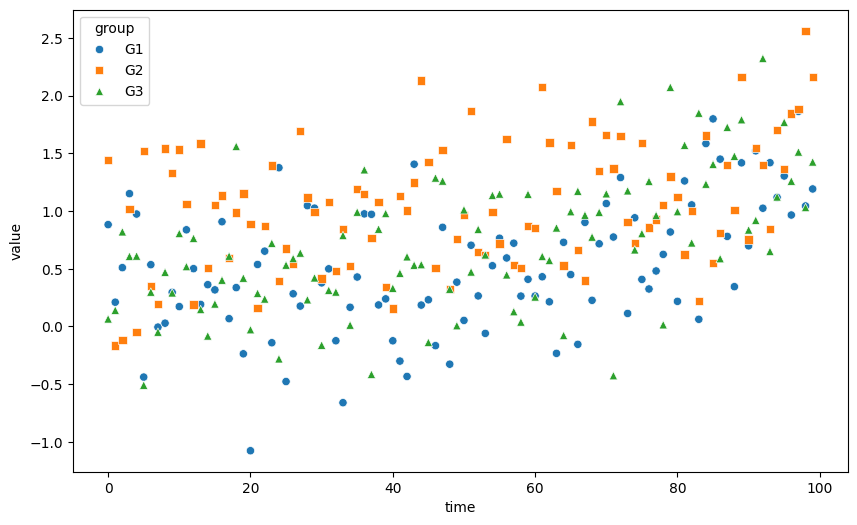

In [5]:
# plot the data
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_1_2, x='time', y='value', hue='group', style='group', markers=['o', 's', '^'])

### Fixed Effects of df_1

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
for item in df_1_2['group'].unique():
    lm = LinearRegression()
    lm.fit(np.asarray(df_1_2[df_1_2['group'] == item]['time']).reshape(-1,1),
           df_1_2[df_1_2['group'] == item]['value'])
    print(f"Group: {item}, Coefficient: {lm.coef_[0]}, Intercept: {lm.intercept_}")

Group: G1, Coefficient: 0.008498349168608876, Intercept: 0.10423572392110297
Group: G2, Coefficient: 0.007080468022766024, Intercept: 0.6855233182470004
Group: G3, Coefficient: 0.011472822938003087, Intercept: 0.1474791342890157


In [8]:
# Train a linear model on the entire dataset
X = np.asarray(df_1_2['time']).reshape(-1,1)
Y = np.asarray(df_1_2['value'])

lm2 = LinearRegression()
lm2.fit(X,Y)

print(f"Overall Coefficient: {lm2.coef_[0]}, Intercept: {lm2.intercept_}")

Overall Coefficient: 0.009017213376459325, Intercept: 0.3124127254857066


### Boostrap Simulation

In [9]:
df_2 = pd.read_csv(r"C:\Users\JT von Seggern\DS Masters Repos\2025-summer-mod-6\homework_2.2.csv")
df_2 = df_2.drop(columns=['Unnamed: 0'])
df_2.head()

,X,Y,Z
0,0,1.182435,-0.725820
1,0,2.714474,0.563476
2,0,0.077612,-0.435632
3,0,-0.154449,-0.104553
4,0,22.298992,-2.321273


In [10]:
df_2.describe()

,X,Y,Z
count,10000.000000,10000.000000,10000.000000
mean,0.197200,5.498005,-0.000690
std,0.397905,7.307418,0.990785
min,0.000000,-0.200000,-3.694285
25%,0.000000,0.608725,-0.663618
50%,0.000000,3.080435,-0.010368
75%,0.000000,7.378477,0.669695
max,1.000000,71.935798,3.598310


<Axes: xlabel='Z', ylabel='Y'>

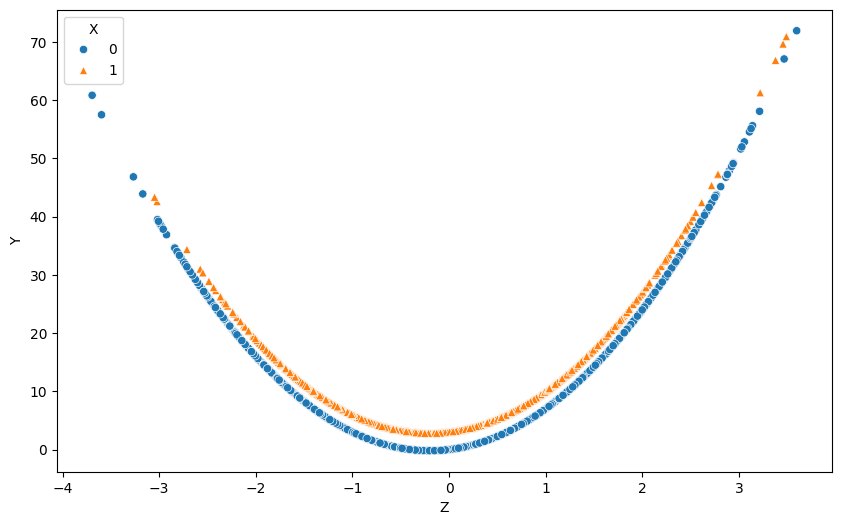

In [11]:
# Plot the data
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_2, x='Z', y='Y', hue='X', style='X', markers=['o', '^'])

In [12]:
# find the mean for each unique value of X
df_2['diff'] = df_2['Y'] - df_2['Z']
mean_0 = df_2[df_2['X'] == 0]['diff'].mean()
mean_1 = df_2[df_2['X'] == 1]['diff'].mean()
means = mean_1 - mean_0
means

np.float64(2.8727011728382346)

Bootstrap variance of the difference in means: 0.0302


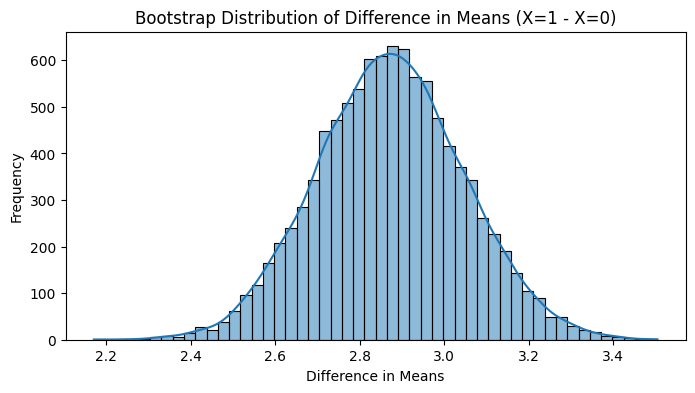

In [13]:
# Boostrap simulation to estimate the variance of the different in means
n_bootstraps = 10000
boot_diffs = np.empty(n_bootstraps)

for i in range(n_bootstraps):
    # Sample with replacement from the rows of df_2
    sample = df_2.sample(n=len(df_2), replace=True)
    # Calculate the mean of (Y - Z) for each X group
    mean_0 = sample[sample['X'] == 0]['Y'].sub(sample[sample['X'] == 0]['Z']).mean()
    mean_1 = sample[sample['X'] == 1]['Y'].sub(sample[sample['X'] == 1]['Z']).mean()
    # Store the difference
    boot_diffs[i] = mean_1 - mean_0

# Calculate the variance of the bootstrapped differences
variance = np.var(boot_diffs)
print(f"Bootstrap variance of the difference in means: {variance:.4f}")

# Optionally, plot the bootstrap distribution
plt.figure(figsize=(8,4))
sns.histplot(boot_diffs, bins=50, kde=True)
plt.title("Bootstrap Distribution of Difference in Means (X=1 - X=0)")
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.show()

In [14]:
import statsmodels.api as sm
from scipy.stats import skew

# Calculate the effect: difference between Y and Z
df_2['effect'] = df_2['Y'] - df_2['Z']

# Linear regression: effect ~ X (with intercept)
X = sm.add_constant(df_2['X'])  # Adds intercept
y = df_2['effect']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Calculate skewness of the effect
effect_skewness = skew(df_2['effect'])
print(f"Skewness of the effect (Y-Z): {effect_skewness:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 effect   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 30 May 2025   Prob (F-statistic):           2.50e-59
Time:                        19:16:26   Log-Likelihood:                -33634.
No. Observations:               10000   AIC:                         6.727e+04
Df Residuals:                    9998   BIC:                         6.729e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9322      0.078     63.219      0.0

In [21]:
from scipy.stats import skew
treated_effect = df_2[df_2['X'] == 1]['effect']
treated_skewness = skew(treated_effect)
print(f"Difference in Skewness of the treated effect vs Overall Effect: {(treated_skewness):.4f}")

Difference in Skewness of the treated effect vs Overall Effect: 2.9047


Bootstrap variance of the mean: 0.0010


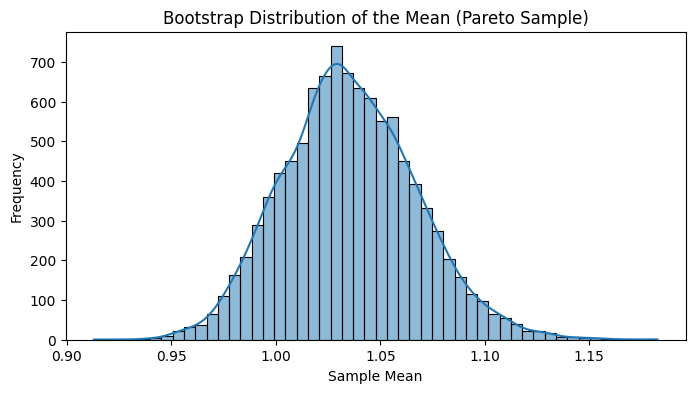

In [29]:
# Generate synthetic data from a Pareto distribution
shape = 2.0
size = 10000

pareto_data = np.random.pareto(a=shape, size=size)  # shift to start at 1
df_pareto = pd.DataFrame({'pareto_sample': pareto_data})

# Bootstrap simulation to estimate the variance of the mean
n_bootstraps = 10000
boot_means = np.empty(n_bootstraps)

for i in range(n_bootstraps):
    sample = df_pareto['pareto_sample'].sample(n=len(df_pareto), replace=True)
    boot_means[i] = sample.mean()

variance_of_mean = np.var(boot_means)
print(f"Bootstrap variance of the mean: {variance_of_mean:.4f}")

# Optionally, plot the bootstrap distribution of means
plt.figure(figsize=(8, 4))
sns.histplot(boot_means, bins=50, kde=True)
plt.title("Bootstrap Distribution of the Mean (Pareto Sample)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()